## Analysis of Yelp Dataset Portfolio2 

In [ ]:
#Mounting Google Drive so as to read dataset csv file from Google Drive
from google.colab import drive
drive.mount('/content/drive')

The portfolio aims to use various data processing techniques to clean and preprocess the data, filter out irrelevant data, and remove any outliers that could impact the accuracy of the model. Finally, the portfolio aims to use linear regression models to train and validate the model's accuracy in predicting user ratings towards business. Ultimately, the objective is to build a reliable model that can be used to provide insights into user preferences and help businesses make data-driven decisions to improve their services and offerings. In this task, we will explore the impacts of feature selections and different sizes of training/testing data on the model performance. We will use Yelp sub-dataset.

### Import the output sample data from Portfolio1
The csv file named `Yelp_Portfolio2_Input.csv` is provided. You may need to use the Pandas method, i.e., `read_csv`, for doing this. After that, please import the csv file and print out its total length.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

In [ ]:
sample_data = pd.read_csv('/content/drive/MyDrive/Portfolio2/Yelp_Portfolio2_Input.csv')
print("Length of the dataset is:",len(sample_data))

Length of the dataset is: 38654


# Q1. `business_categories` processing

You may notice that there are a total of 693 unique business categories present in the sample data. Please write a code snippet to confirm this number. Then, generate a boxplot of `stars` for `business_categories`.

In [ ]:
print("Total number of unique business categories is:",sample_data['business_categories'].nunique())

Total numbe of unique business categories is: 693


<Axes: xlabel='business_categories', ylabel='stars'>

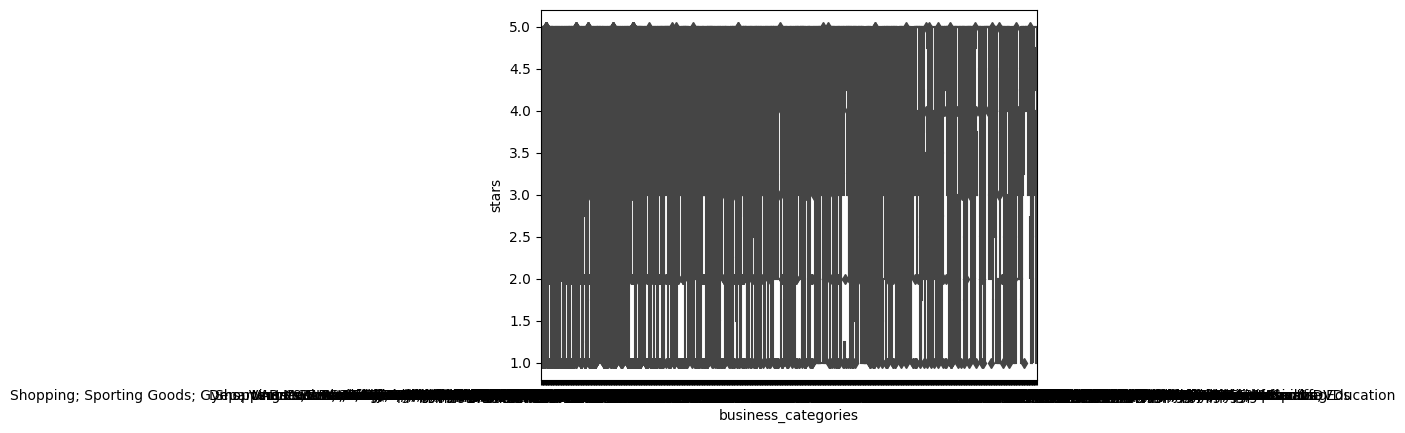

In [ ]:
#Generate a boxplot of stars for business_categories
sns.boxplot(x='business_categories', y= 'stars', data=sample_data)

Sometimes we need to extract some major categories, such as `Middle Eastern; Restaurants` and `Sushi Bars; Restaurants`, both of which should belong to the `Restaurants` category.

### Q1.1 How to efficiently and accurately extract the last category value (i.e., categorieN) from the `business_categories` column in a dataset, where the format of each row is a semicolon-separated list of categories (i.e., 'categorie1; categorie2;...;categorieN')? and replace the original string with this last category value. At last, print the first five rows.

In [ ]:
#Replacing original string with last category value
sample_data['business_categories'] = sample_data['business_categories'].apply(lambda values: values.split(';')[-1])


In [ ]:
#Printing first 5 rows after extracting last category value
sample_data.head()

,business_categories,business_city,business_id,date,stars,text,useful,user_id
0,Restaurants,Tempe,6oRAC4uyJCsJl1X0WZpVSA,14/6/2012,4,love the gyro plate. Rice is so good and I als...,1,0hT2KtfLiobPvh6cDC8JQg
1,Beauty & Spas,Tempe,WGNIYMeXPyoWav1APUq7jA,23/12/2011,4,"Good tattoo shop. Clean space, multiple artist...",2,Xm8HXE1JHqscXe5BKf0GFQ
2,Automotive,Glendale,rxQ2PIjhAx6dgAqUalf99Q,9/9/2012,5,Never having dealt with a Discount Tire in Pho...,0,HLbhD2OyiMCUDRR4c1iXaw
3,Restaurants,Tempe,EC9WB-iVjd28B6R6KIZ8TA,4/8/2010,4,Cliff notes\n- Cheap: $1-2/plate\n- Fast: It's...,0,jdoGEEy5s-5L1O_lNzEi2g
4,Cinema,Tempe,LDJhwZN14AZOJyHjg2lkRw,13/12/2011,4,We got passes for the preview of Mission Impos...,0,Mb0psF4WQF7gZSuZafVr-g


### Q1.2 Let's first check how many unique business categories are present in the dataset (output from Q1.1). Maybe it's still not an appropriate number to make a clear Boxplot. Now, we want to display `ALL Rows` of the business category count data. That is to count and print the number of occurrences for each business category.

In [ ]:
# Count and print the number of occurrences for each business category
#sample_data.groupby(['business_categories'])['business_categories'].count()

business_category_counts = sample_data.groupby('business_categories').size().reset_index(name='count')

#Renaming column names for better Readability
business_category_counts = business_category_counts.rename(columns={'business_categories': 'Business Category', 'count': 'Occurrence'})

# Print the results
print(business_category_counts)

                Business Category  Occurrence
0                     Accessories          66
1                     Active Life           7
2                           Adult          11
3            Amateur Sports Teams           6
4                 Amusement Parks          72
..                            ...         ...
190         Professional Services           3
191  Public Services & Government           7
192       Religious Organizations           7
193                   Restaurants         189
194                      Shopping          45

[195 rows x 2 columns]


### Q1.3 We want to remove categories that appear fewer than 200 times. Write a Python code snippet to perform this operation. At last, print the number of resulting unique business_categories.

In [ ]:
# your code and solutions
category_counts = sample_data.groupby('business_categories')['business_categories'].count().reset_index(name='count')

#Categories less than 200
filtered_categories = category_counts[category_counts['count'] < 200]['business_categories']

In [ ]:
#Dropping business category having count less than 200
sample_data = sample_data.drop(sample_data[sample_data.business_categories.isin(filtered_categories.tolist())].index)

In [ ]:
print("Total unique business categories:",sample_data['business_categories'].nunique())

Total unique business categories: 19


# Q2. Outliers

### Q2.1 Remove any rows from the sample_data DataFrame (output from Q1.3) where the `useful` column has a value of 6 or more; Then, create a single figure with two subplots, one showing the boxplot of `useful` column of the original data and the other showing the boxplot of the data with outliers removed. 

At last, __print the length of the data__.

In [ ]:
#Remove any rows from the where the useful column has a value of 6 or more
without_outliers = sample_data.drop(sample_data[sample_data['useful'] >= 6].index)

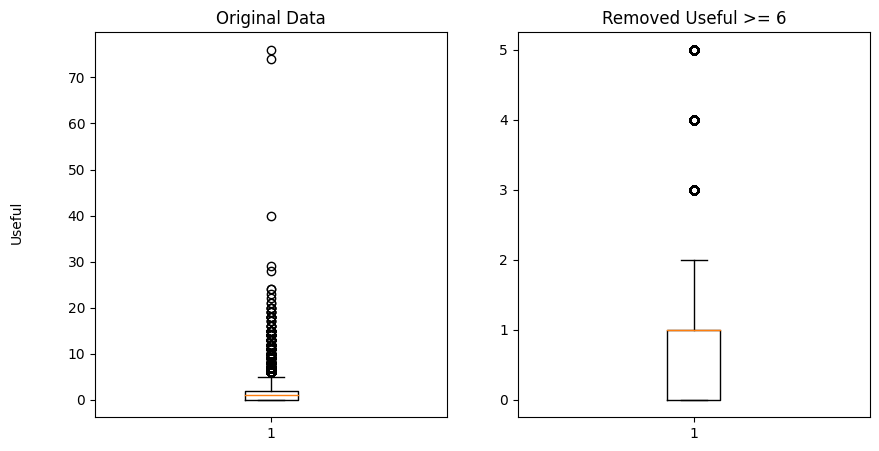

In [ ]:
# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Plot the boxplot of the useful column of the original data
axes[0].boxplot(sample_data['useful'])
axes[0].set_title('Original Data')

# Plot the boxplot of the useful column with values removed greater or equal to 6
axes[1].boxplot(without_outliers['useful'])
axes[1].set_title('Removed Useful >= 6')

# Add a common y-label
fig.text(0.04, 0.5, 'Useful', va='center', rotation='vertical')

# Show the plot
plt.show()


In [ ]:
print("Length of the data without outliers is:",without_outliers.shape[0])

Length of the data without outliers is: 32330


### Q2.2 In general, we might remove some inactive users from a dataset (output from Q2.1), for example, users who rate businesses less than 3 times. However, in this case, we are doing the opposite and removing extremely active users who rate businesses more than 30 times (>30). Again, create a single figure with two subplots, one showing the boxplot of the count of business rating given by each user and the other showing the boxplot of the data with outliers removed. 

At last, __print the length of the data__.

In [ ]:
user_counts = without_outliers['user_id'].value_counts()

#Discarding extremely active users
without_outliers = without_outliers[without_outliers['user_id'].isin(user_counts[user_counts <= 30].index)]

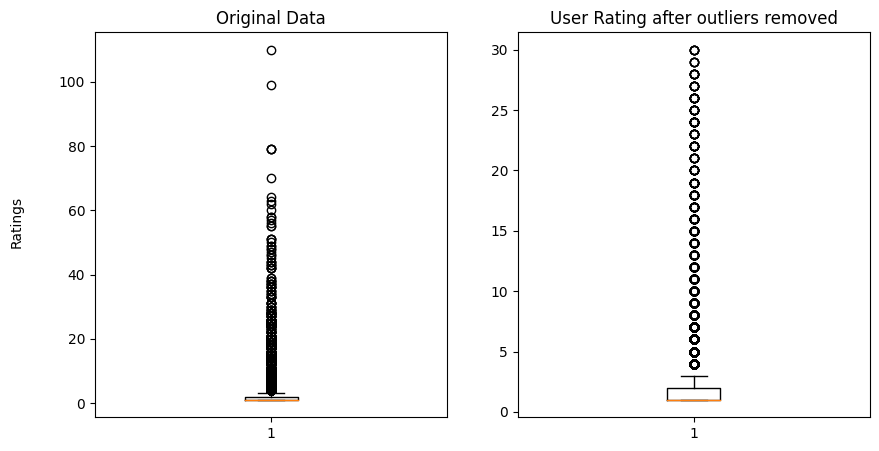

In [ ]:
# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].boxplot(sample_data['user_id'].value_counts())
axes[0].set_title('Original Data')


axes[1].boxplot(without_outliers['user_id'].value_counts())
axes[1].set_title('User Rating after outliers removed')

# Add a common y-label
fig.text(0.04, 0.5, 'Ratings', va='center', rotation='vertical')

# Show the plot
plt.show()


In [ ]:
print("Length of new data:",without_outliers.shape[0])


Length of new data: 29621


# Q3. Training a LinearRegression model on the data output from Q2.2.

### Q3.1 How to build a linear regression model on a subset of the data, using the `useful` column as the input variable and the `stars` column as the output variable. Split the data into a training set and a test set, with 70% of the data used for training. The random_state is set to 42.

In [ ]:
# your code and solutions
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score

X = without_outliers['useful']
y = without_outliers['stars']
X = np.array(X).reshape(-1,1)

#Splitting the dataset for training and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


model = LinearRegression()
model.fit(X_train, y_train)

predicted = model.predict(X_test)
print("MSE:", mean_squared_error(y_test, predicted))
print("R^2:", r2_score(y_test, predicted))



MSE: 1.4936824590295215
R^2: 0.006600790492057307


### Q3.2 Assuming that the number of reviews a business has received  `business_review_count`  can greatly influence the average rating that the business has received. Now, we create the relevant variable to the data, and do the LinearRegression again to the `stars`. 

In [ ]:
business_review_count = without_outliers.groupby('business_id')['text'].size().reset_index(name='business_review_count')

In [ ]:
#Appending business review counts to main dataset
business_review_df = pd.merge(without_outliers, business_review_count,on='business_id')


In [ ]:
X = business_review_df['business_review_count'].values.reshape(-1,1)
y = business_review_df['stars']

#Splitting the dataset for training and test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)


lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Prediction on the test set
y_pred = lin_reg.predict(X_test)

print("MSE:", mean_squared_error(y_test, y_pred))
print("R^2:", r2_score(y_test, y_pred))


MSE: 1.4572716730825013
R^2: 0.022366050804503934


### Q3.3 Output the correlations between `business_review_count` and `useful` variables with `stars` and analyze the results.

In [ ]:
print("Correlations between 'business_review_count' with 'stars' is", round(business_review_df['business_review_count'].corr(business_review_df['stars']),4))


Correlations between 'business_review_count' with 'stars' is 0.1495


##Analysis of business_review_count and stars
A correlation value of 0.1495 between the "business_review_count" column and the "stars" column means that there is a **weak positive** association between the two variables. Since correlation coefficient is very small, hence the relationship is **not strong**.

In [ ]:
print("Correlations between 'useful' with 'stars' is", round(business_review_df['useful'].corr(business_review_df['stars']),4))


Correlations between 'useful' with 'stars' is -0.074


## Analysis of useful and stars
A correlation value of -0.074 between the "useful" column and the "stars" column means that there is a weak negative association between the two variables.Since correlation coefficient is very small, hence the relationship is not strong.
